In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [502]:
from PIML.box.boxWR import BoxWR

In [503]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [117.48897989212539, 123.16229361336093, 120.33565696776952, 98.8894386351706, 84.25218133385484, 71.75295764285396, 63.04060283820937, 39.552500618318795, 21.888181176472436, 8.51317591907856, 5.2393267192169395]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


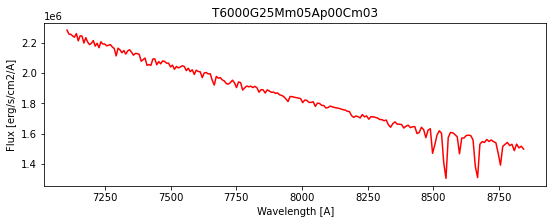

In [504]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

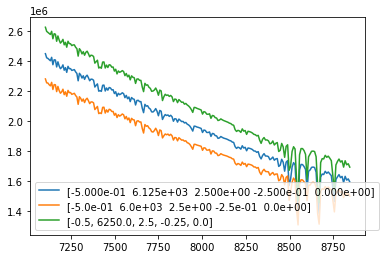

In [505]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
b.test_rbf(b.PhyMid, pmt2)

In [558]:
from PIML.nn.dnn.dnnWR import dnnWR

In [559]:
d = dnnWR(b)

In [560]:
NL=100
d.prepare_model(train_NL= NL, mtype="NoiseDNN") 

Layers: [10, 64, 32, 16, 3]


In [561]:
d.prepare_data(nTrain=100000, nTest=1000, test_NL=NL)

In [568]:
d.run(lr=0.01, dp=0.1, batch=128, nEpoch=1000, verbose=2)

Epoch 1/1000
625/625 - 10s - loss: 0.0441 - mean_squared_error: 0.0441 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 2/1000
625/625 - 9s - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/1000
625/625 - 9s - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 4/1000
625/625 - 10s - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 5/1000
625/625 - 8s - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 6/1000
625/625 - 8s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 7/1000
625/625 - 9s - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 8/1000
625/625 - 9s - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 9/1000
625/625 -

2022-01-20 11:32:08.618387: W tensorflow/core/framework/op_kernel.cc:1751] Invalid argument: ValueError: callback pyfunc_188 is not found
Traceback (most recent call last):

  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_188 is not found


2022-01-20 11:32:08.618492: W tensorflow/core/kernels/data/generator_dataset_op.cc:107] Error occurred when finalizing GeneratorDataset iterator: Invalid argument: ValueError: callback pyfunc_188 is not found
Traceback (most recent call last):

  File "/datascope/slurm/miniconda3/envs/ae-tf/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 238, in __call__
    raise ValueError("callback %s is not found" % token)

ValueError: callback pyfunc_188 is not found


	 [[{{node PyFunc}}]]


625/625 - 10s - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 26/1000
625/625 - 8s - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch 27/1000
625/625 - 9s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 28/1000
625/625 - 8s - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 29/1000
625/625 - 9s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 30/1000
625/625 - 9s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch 31/1000
625/625 - 7s - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 32/1000
625/625 - 8s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 33/1000
625/625 - 7s - 

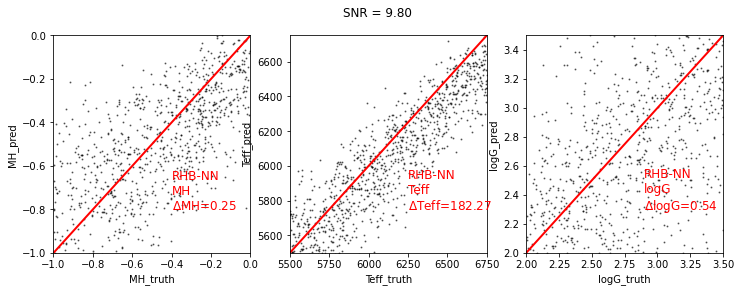

In [566]:
d.init_eval()

In [487]:
d.p_train

array([[-2.12295356e-01,  5.94497468e+03,  2.82465512e+00],
       [-7.76628434e-01,  6.02289376e+03,  2.24206873e+00],
       [-6.78966855e-01,  6.27386669e+03,  2.27658494e+00],
       ...,
       [-6.62562760e-01,  6.25066573e+03,  2.18828148e+00],
       [-3.98494435e-01,  5.58079054e+03,  2.12909597e+00],
       [-3.05029374e-01,  6.55883854e+03,  2.55873486e+00]])

In [488]:
d.PhyMid

array([-5.0e-01,  6.0e+03,  2.5e+00, -2.5e-01,  0.0e+00])

In [493]:
d.p_train

array([[-2.12295356e-01,  5.94497468e+03,  2.82465512e+00],
       [-7.76628434e-01,  6.02289376e+03,  2.24206873e+00],
       [-6.78966855e-01,  6.27386669e+03,  2.27658494e+00],
       ...,
       [-6.62562760e-01,  6.25066573e+03,  2.18828148e+00],
       [-3.98494435e-01,  5.58079054e+03,  2.12909597e+00],
       [-3.05029374e-01,  6.55883854e+03,  2.55873486e+00]])

In [490]:
d.y_train

array([[0.78770464, 0.35597975, 0.54977008],
       [0.22337157, 0.41831501, 0.16137915],
       [0.32103315, 0.61909335, 0.18438996],
       ...,
       [0.33743724, 0.60053259, 0.12552099],
       [0.60150557, 0.06463243, 0.08606398],
       [0.69497063, 0.84707083, 0.3724899 ]])

In [543]:
d.dnn.predict(d.x_train)

array([[0.8145803 , 0.39459935, 0.38988236],
       [0.39645544, 0.3587197 , 0.10854305],
       [0.26181445, 0.11131811, 0.625519  ],
       ...,
       [0.14897439, 0.56887704, 0.3927704 ],
       [0.9536978 , 0.02517392, 0.48541567],
       [0.7151429 , 0.11094011, 0.40575927]], dtype=float32)

In [544]:
d.x_test

array([[-2.02323563e+00,  8.34408121e-03, -5.29933388e-02,
        -2.89153453e-02,  1.50054532e-02, -1.88698174e-03,
         2.46847966e-03,  8.68028496e-03, -4.89958519e-03,
        -1.96306242e-03],
       [-1.98447724e+00, -7.13768866e-02, -1.58814701e-02,
        -9.42151959e-03,  2.02834483e-02, -1.12240202e-02,
         2.18873262e-03, -7.83325124e-03, -8.34588974e-03,
        -3.34965767e-03],
       [-1.60125201e+00, -5.18446065e-02, -1.37902769e-01,
         2.51263384e-02,  1.32365138e-02, -7.69597914e-03,
         5.82267079e-03,  3.70102850e-03,  5.57014701e-03,
         3.28389638e-03],
       [-2.03715887e+00, -1.34389610e-01, -4.59069725e-02,
        -1.25988377e-02, -5.97564667e-03, -2.69286169e-03,
        -2.66330786e-03, -7.50912996e-03, -1.11597079e-05,
         1.00421678e-03],
       [-1.98396722e+00, -1.52159184e-01, -5.81117828e-02,
        -8.57235795e-03,  7.34234022e-03, -3.65922208e-03,
         3.03570566e-03, -1.28288625e-02, -4.57101955e-04,
         3.

In [486]:
d.predict(d.x_train[0])

array([[-1.00030254e+00,  5.49955753e+03,  1.99992646e+00],
       [-9.99742508e-01,  5.49956056e+03,  1.99964212e+00],
       [-1.00003848e+00,  5.49942347e+03,  2.00009324e+00],
       ...,
       [-1.00044481e+00,  5.49969321e+03,  1.99963251e+00],
       [-9.99509778e-01,  5.49942379e+03,  1.99920951e+00],
       [-1.00021308e+00,  5.50017158e+03,  1.99968405e+00]])

In [428]:
d.p_test

array([[-1.00000000e+00,  5.50000000e+03,  2.00000000e+00],
       [-5.00000000e-01,  5.91666667e+03,  2.30000000e+00],
       [-7.50000000e-01,  6.33333333e+03,  2.60000000e+00],
       [-2.50000000e-01,  5.63888889e+03,  2.90000000e+00],
       [-8.75000000e-01,  6.05555556e+03,  3.20000000e+00],
       [-3.75000000e-01,  6.47222222e+03,  2.06000000e+00],
       [-6.25000000e-01,  5.77777778e+03,  2.36000000e+00],
       [-1.25000000e-01,  6.19444444e+03,  2.66000000e+00],
       [-9.37500000e-01,  6.61111111e+03,  2.96000000e+00],
       [-4.37500000e-01,  5.54629630e+03,  3.26000000e+00],
       [-6.87500000e-01,  5.96296296e+03,  2.12000000e+00],
       [-1.87500000e-01,  6.37962963e+03,  2.42000000e+00],
       [-8.12500000e-01,  5.68518519e+03,  2.72000000e+00],
       [-3.12500000e-01,  6.10185185e+03,  3.02000000e+00],
       [-5.62500000e-01,  6.51851852e+03,  3.32000000e+00],
       [-6.25000000e-02,  5.82407407e+03,  2.18000000e+00],
       [-9.68750000e-01,  6.24074074e+03

In [427]:
d.y_pred

array([[-1.00004312e+00,  5.49933755e+03,  2.00217138e+00],
       [-1.00063436e+00,  5.49989692e+03,  1.99996974e+00],
       [-1.00070919e+00,  5.49982407e+03,  1.99995780e+00],
       [-1.00057259e+00,  5.49976533e+03,  1.99996797e+00],
       [-1.00080919e+00,  5.49991160e+03,  1.99986917e+00],
       [-1.00075536e+00,  5.49973235e+03,  1.99983996e+00],
       [-1.00078386e+00,  5.49968019e+03,  2.00013447e+00],
       [-1.00071616e+00,  5.49982685e+03,  1.99972342e+00],
       [-1.00076854e+00,  5.49972435e+03,  2.00013386e+00],
       [-1.00052522e+00,  5.49981608e+03,  2.00046057e+00],
       [-1.00081615e+00,  5.49975483e+03,  1.99995232e+00],
       [-1.00075718e+00,  5.49975500e+03,  1.99988374e+00],
       [-1.00036454e+00,  5.49963156e+03,  2.00089900e+00],
       [-1.00089395e+00,  5.49987710e+03,  1.99986372e+00],
       [-1.00098721e+00,  5.50004404e+03,  1.99982433e+00],
       [-1.00093344e+00,  5.50011419e+03,  1.99983728e+00],
       [-1.00069455e+00,  5.49981575e+03

In [423]:
d.eval_acc(snr = b.estimate_snr(NL))

AttributeError: 'dnnWR' object has no attribute 'PLT'

In [318]:
aks_train.shape

(32, 10)

In [319]:
train_pmts.shape

(100000, 5)

In [320]:
d.y_train

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.33333333, 0.2       ],
       [0.25      , 0.66666667, 0.4       ],
       ...,
       [0.72414398, 0.61000751, 0.59975936],
       [0.47414398, 0.94334084, 0.79975936],
       [0.97414398, 0.09148899, 0.99975936]])

In [321]:
DG = DataGenerator(aks_train,std_train, train_pmts[:, d.odx], eigv=d.eigv, noise_level=1, batch_size=5, shuffle=False)

In [331]:
d.dnn.model.fit(DG, validation_data=DG)

6/6 [==============================] - 1s 92ms/step - loss: 12380998.0000 - mean_squared_error: 12380998.0000 - val_loss: 12371947.0000 - val_mean_squared_error: 12371947.0000


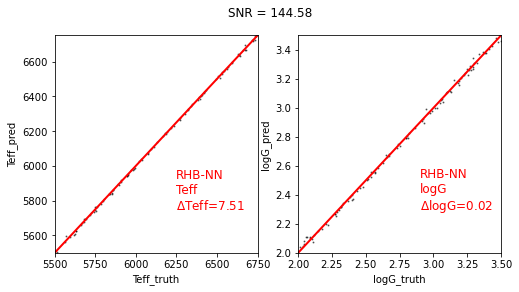

In [370]:
d.eval(snr = b.estimate_snr(NL))

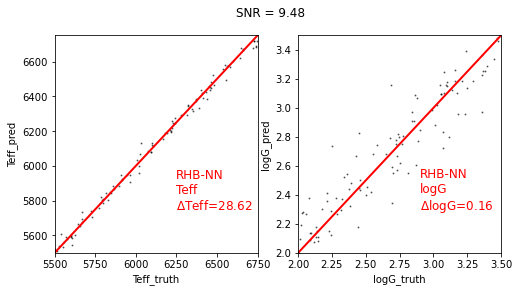

In [378]:
d.eval(snr = b.estimate_snr(NL))

In [ ]:
NL=100
bk_fns_10k, bks_10k = b.get_bk_fns(NL, pmts = train_pmts, out_bks=1)
bk_fns_1k, bks_1k = b.get_bk_fns(NL, pmts = test_pmts, out_bks=1)

In [382]:
bk_N_obs = b.get_bks_N_obs_from_pmt(noise_level=NL, pmt=b.PhyMid, N_obs=100)

In [391]:
b.PhyMid[d.odx]

array([6.0e+03, 2.5e+00])

In [395]:
d.eval_pmt_noise(bk_N_obs, b.PhyMid, 100)

(100, 2)
(100, 2)


TypeError: plot_box() missing 1 required positional argument: 'pdxs'

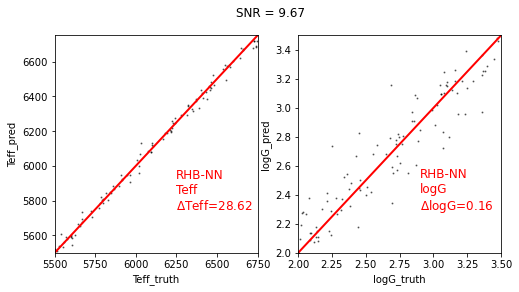

In [409]:
d.init_eval(NL, b.estimate_snr, b.get_bks_N_obs_from_pmt)

100%|██████████| 10/10 [00:01<00:00,  5.81it/s]


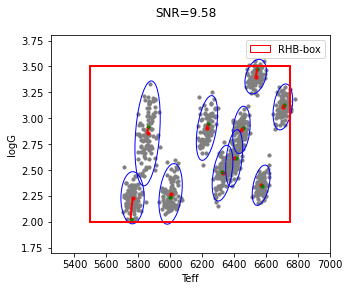

In [424]:
np.random.seed(926)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(pmts, NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


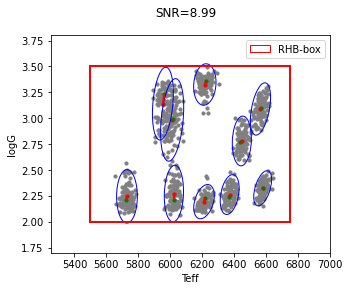

In [419]:
np.random.seed(1015)
pmts = b.get_random_pmt(10)
d.eval_pmts_noise(test_pmts[:10], NL, 100, 0.2)

100%|██████████| 10/10 [00:01<00:00,  7.95it/s]


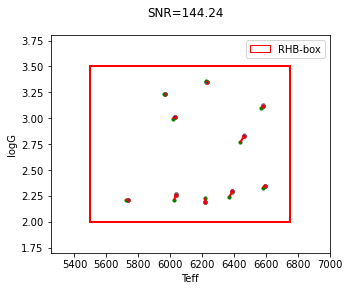

In [418]:
d.eval_pmts_noise(test_pmts[:10], 1, 10, 0.2)

In [407]:
preds

array([[5.93780401e+03, 2.49332368e+00],
       [6.03775650e+03, 2.57310952e+00],
       [5.98682369e+03, 2.56321526e+00],
       [6.05845223e+03, 2.55700625e+00],
       [5.96359144e+03, 2.67684199e+00],
       [5.95436975e+03, 2.30935119e+00],
       [6.02049469e+03, 2.90595248e+00],
       [5.99716830e+03, 2.22376805e+00],
       [6.03746711e+03, 2.37784439e+00],
       [5.99777813e+03, 2.34425741e+00]])

In [ ]:
# d.run(lr=0.01, dp=0.2, nEpoch=100, verbose=0)